# Predictiong heart disaese using machine learning

Building  a machine learning model capable of predictiong whether or not someone has heart disease bsed on their medical attributes .

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



## 1. Problem Definition
In a statement,
> Given clinical paramenters about a patient , can we predict whether or not they have heart disease ?

## 2. Data 
Data is from UCI Cleaveland heart disease data.

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 
This is where you'll get different information about each of the features in your data.

**Data Dictionary**

- **age** - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type
  - 0: Typical angina: chest pain related to decreased blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non-heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease
- **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
  - Anything above 130-140 is typically cause for concern
- **chol** - serum cholesterol in mg/dl
  - Serum = LDL + HDL + 0.2 * triglycerides
  - Above 200 is cause for concern
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - '>126' mg/dL signals diabetes
- **restecg** - resting electrocardiographic results
  - 0: Nothing to note
  - 1: ST-T Wave abnormality
    - Can range from mild symptoms to severe problems
    - Signals non-normal heartbeat
  - 2: Possible or definite left ventricular hypertrophy
    - Enlarged heart's main pumping chamber
- **thalach** - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- **oldpeak** - ST depression induced by exercise relative to rest
  - Looks at stress of heart during exercise; unhealthy heart will stress more
- **slope** - the slope of the peak exercise ST segment
  - 0: Upsloping: better heart rate with exercise (uncommon)
  - 1: Flat sloping: minimal change (typical healthy heart)
  - 2: Down sloping: signs of an unhealthy heart
- **ca** - number of major vessels (0-3) colored by fluoroscopy
  - Colored vessel means the doctor can see the blood passing through
  - The more blood movement the better (no clots)
- **thal** - thallium stress result
  - 1,3: normal
  - 6: fixed defect: used to be a defect but ok now
  - 7: reversible defect: no proper blood movement when exercising
- **target** - have disease or not (1 = yes, 0 = no) (the predicted attribute)
sible defect
dicted attribute

In [1]:
# Import all the tools we need

#Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## data Explorastion (EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with .
1. what questions are you trying to solve?
2. what kind of data do we have and how do we treat different types ?
3. what's missing fom the data and how do you deal with it?
4. where are the outliers and why you should care about them ?
5. How can you add,change or remove feature to get more out of your data ?
   

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

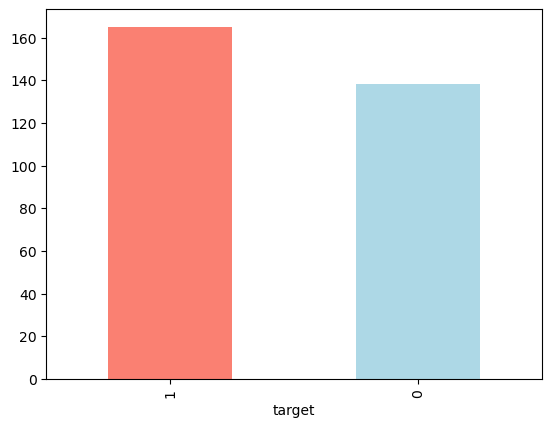

In [5]:
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#heart disease Frequency according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


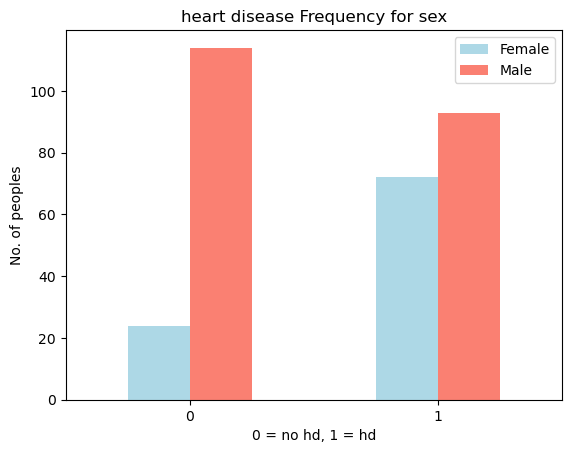

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["lightblue","salmon"])
plt.title("heart disease Frequency for sex")
plt.xlabel("0 = no hd, 1 = hd")
plt.ylabel("No. of peoples")
plt.legend(["Female","Male"]);
plt.xticks(rotation =0); # rotates the labels of X

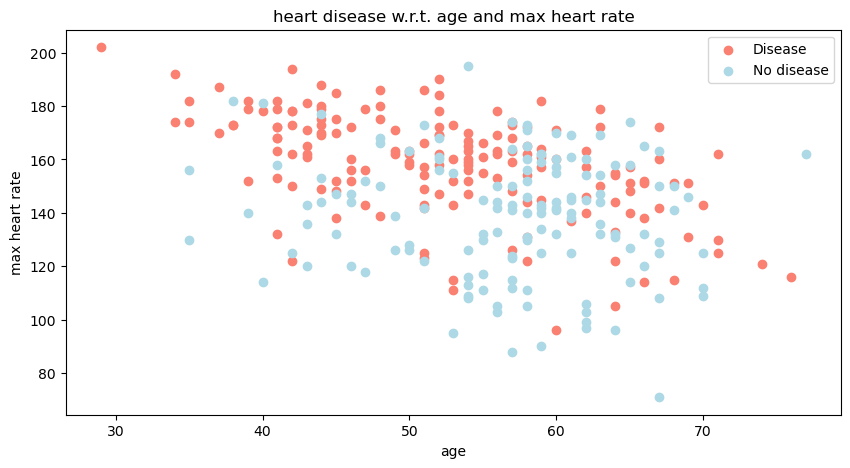

In [12]:
## compareing Age Vs thelach(max heart rate) with target

plt.figure(figsize=(10,5))

#scatter with heart disease patients.
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c = "salmon");

#scatter with non heart disease patients.
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c = "lightblue")

plt.title("heart disease w.r.t. age and max heart rate")
plt.legend(["Disease","No disease"])
plt.xlabel("age")
plt.ylabel("max heart rate");

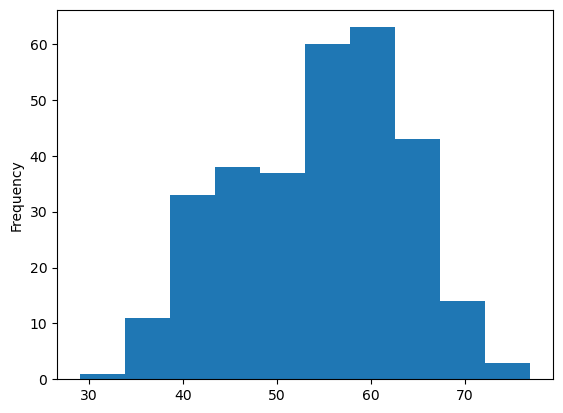

In [13]:
#check distiution of age in our data
df.age.plot.hist();

In [14]:
## Heart Disease frequency per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


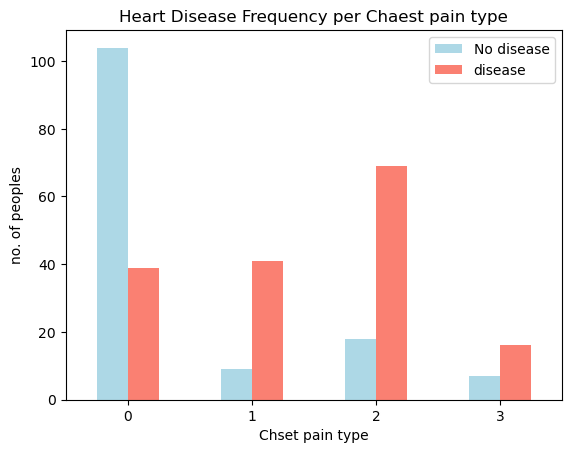

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightblue","salmon"])

plt.title("Heart Disease Frequency per Chaest pain type")
plt.xlabel("Chset pain type")
plt.ylabel("no. of peoples")
plt.legend(["No disease","disease"])
plt.xticks(rotation = 1);

In [16]:
## Correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


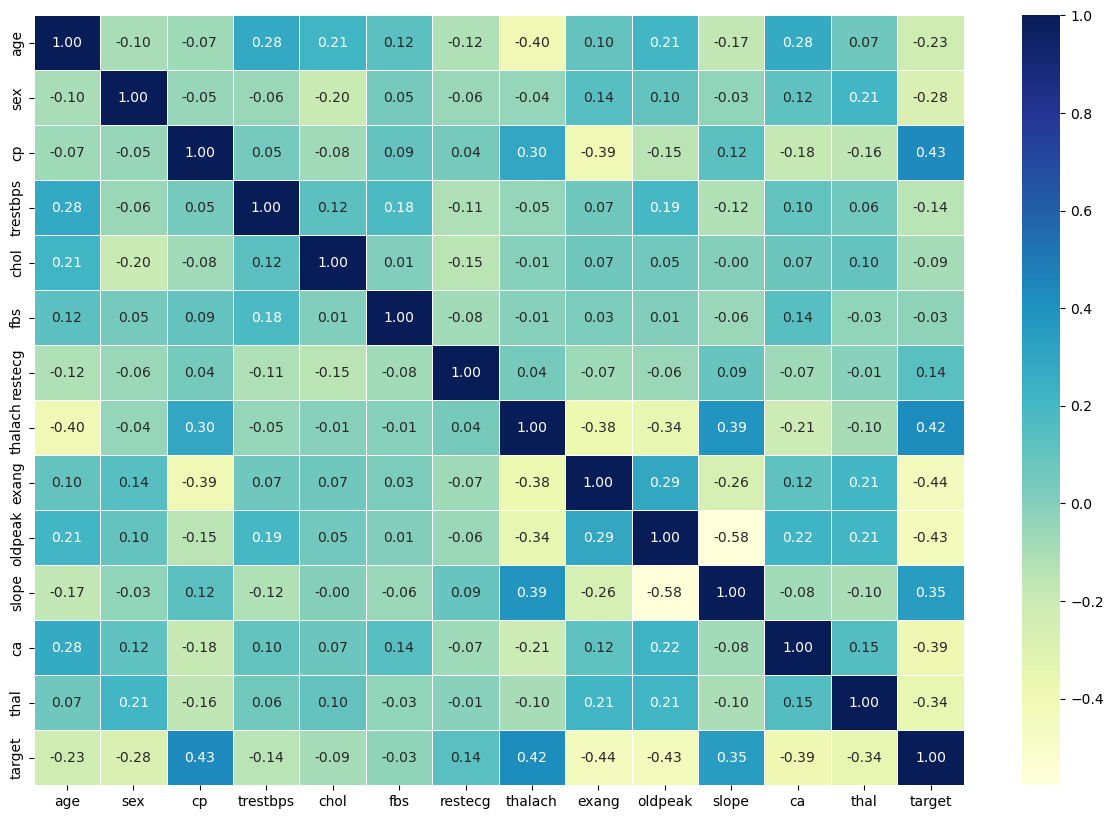

In [17]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap = "YlGnBu");
# bottom,top=ax.get_ylim()
# ax.set_ylim(bottom+0.5,top-0.5)

In [18]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


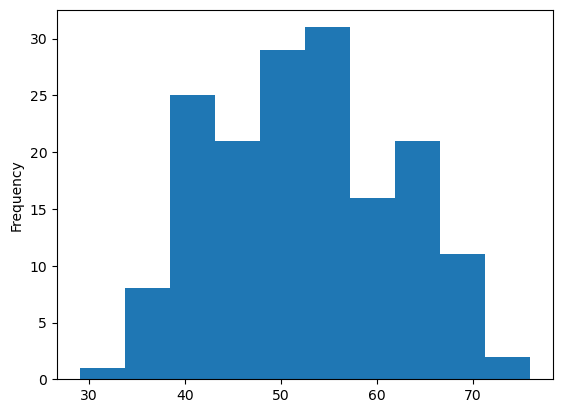

In [19]:
#check distiution of age in our data
df.age[df.target==1].plot.hist();

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:

# Filter rows where age is between 60 and 80 (inclusive) and target is 1
filtered_df = df[(df['age'] >= 60) & (df['age'] <= 80) & (df['target'] == 1)]

# Calculate the count (sum) of the filtered data (already a boolean Series)
count = len(filtered_df)

# Print the count
print(count)

38


In [22]:
count

38

## 5.Modelling

In [23]:
# splittting the data
X = df.drop("target",axis=1)
y = df["target"]



In [24]:
np.random.seed(9)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)


We're going to try 3 different machine learning models:
1. Logisctic Regression
2. K-Nearrest neighbours Classsifier
3. Random forest Classifier

In [25]:
# Creating a function for models to evaluate and find the best 

models = {"LogisticRegression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RandomForest":RandomForestClassifier()}

def fit_n_score(models,Xtrain,Xtest,ytrain,ytest):
    """
    Fitsa and eavluates given macine learning models.
    models:a dict of differnt scikit-learn models
    Xtrain:X training data
    Xtest:X testing data
    ytrain: y trainng data
    ytest: Y testing data"""

    #set randomaseed
    np.random.seed(99)
    #make a dictionary to keep scores
    model_scores={}
    #Loop through modelas
    for name, model in models.items():
        model.fit(Xtrain,ytrain) # fitting model
        score =model.score(Xtest,ytest) # scoring model
        model_scores[name] = score 

    print("Maximum score: "+str(max(zip(model_scores.values(),model_scores.keys()))))
    return model_scores

In [26]:
model_scores=fit_n_score(models,Xtrain,Xtest,ytrain,ytest)

D:\yash\heart_disease_classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Maximum score: (0.8360655737704918, 'LogisticRegression')


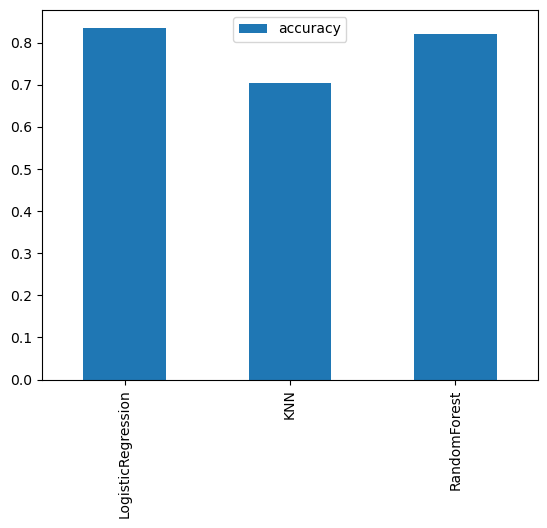

In [27]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline  model..and we know a model's first predictions aren't always what we should based our next steps off.
Let's look at the following:
* hyperparameters tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under th curve(AUC)

### Hyperparameters tuning

In [28]:
# Let's tune KNN
train_scores = []
test_scores = []
#Create a list of different values for knn
neighbors = range(1,21)
# Instance KNN
knn = KNeighborsClassifier()

#Loop
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    train_scores.append(knn.score(Xtrain,ytrain))
    test_scores.append(knn.score(Xtest,ytest))

In [29]:
train_scores

[1.0,
 0.8016528925619835,
 0.7892561983471075,
 0.7355371900826446,
 0.7396694214876033,
 0.7479338842975206,
 0.731404958677686,
 0.7066115702479339,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.7024793388429752,
 0.6859504132231405,
 0.7066115702479339,
 0.6900826446280992,
 0.6942148760330579,
 0.7066115702479339,
 0.6942148760330579,
 0.6942148760330579,
 0.6735537190082644]

In [30]:
test_scores

[0.7049180327868853,
 0.5901639344262295,
 0.7377049180327869,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869]

Maximum KNN score on the test data: 75.41 %


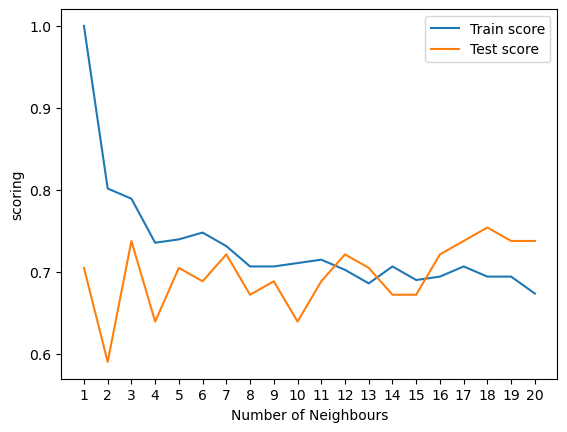

In [31]:
plt.plot(neighbors,train_scores,label=":train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xlabel("Number of Neighbours")
plt.ylabel("scoring")
plt.legend(["Train score","Test score"])
plt.xticks(range(1,21));

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f} %")

### Hyperparameters tuning with Randomised Search CV
we're going to tune 
* Logistic Regression 
* RandomForestClassifier

In [48]:
# Creating a hyperparameter grid for LogisticRegrssion.
log_reg_grid= {"C":np.logspace(-4,4,20),
              "solver": ["liblinear" ,'newton-cg']}
              
# Creating a hyperparameter grid for RandomForesClassifier.
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,8],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }


In [39]:
#Tuning Logistic Regression
np.random.seed(99)

logr_rs = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_reg_grid,
                            cv =5,
                            n_iter = 30,
                            verbose=True)
logr_rs.fit(Xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg']},
                   verbose=True)

In [40]:
logr_rs.score(Xtest,ytest)

0.8360655737704918

In [41]:
logr_rs.best_params_

{'solver': 'newton-cg', 'C': 0.615848211066026}

In [49]:
#Tuning Hyperparameters for RandomForestClassifier
np.random.seed(99)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter = 30,
                          cv=5,
                          verbose=True)
rs_rf.fit(Xtrain,ytrain)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 8],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_rf.score(Xtest,ytest)

0.7868852459016393

In [51]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_depth': 5}

### Hyperparameters tuning with Gridsearchcv
Since our Logisticregression model provides the bset scores so far,
we'll try and improve them again using GridSearchCV .

In [52]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear","newton-cg"]}

lgr_gs = GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                     cv=5,
                     verbose=True)

lgr_gs.fit(Xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'newton-cg']},
             verbose=True)

In [53]:
lgr_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'newton-cg'}

In [54]:
lgr_gs.score(Xtest,ytest)

0.8524590163934426

In [55]:
model_scores

{'LogisticRegression': 0.8360655737704918,
 'KNN': 0.7049180327868853,
 'RandomForest': 0.819672131147541}

In [56]:

# X-axis = model predictions

# y-axis = true labels

## Evaluating our tuned machine learning classifier ,beyound accuracy
* ROC crve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

and it would be great if we use cross-validation wherever necesary.

In [58]:
 ypreds = lgr_gs.predict(Xtest)
ypreds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

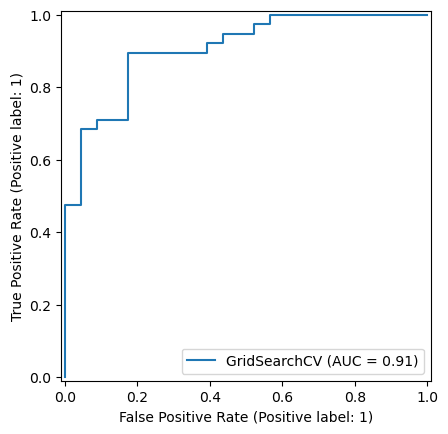

In [70]:
# plot ROC curve and calculate AUC score

RocCurveDisplay.from_estimator(lgr_gs,Xtest,ytest );

In [71]:
confusion_matrix(ytest,ypreds)

array([[19,  4],
       [ 5, 33]], dtype=int64)

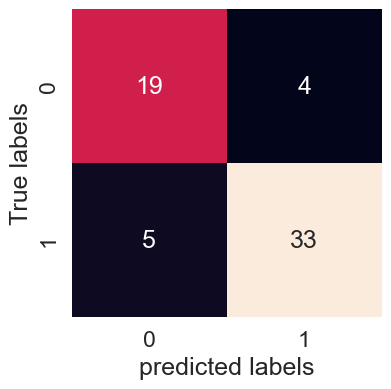

In [74]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,ypreds):
    """PLots a confusion matrix using Seaborns heatmap()."""

    fig,ax= plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test,ypreds),
                    annot=True,
                    cbar=False)
    plt.xlabel("predicted labels")  # X-axis = model predictions
    plt.ylabel("True labels") # y-axis = true labels

plot_conf_mat(ytest,ypreds)

In [75]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.89      0.87      0.88        38

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.85      0.85        61



In [77]:
# precision becomes 1 when ,model predicts 0 and truth is 1 i.e FalsePositives are None.
#recall becomes 1 when, model predicts 1 and truth is 0 i.e. FalseNegatives are None.

### Calculate evaluation metrics using cross_validation
calculating accuracy,precision,recall and f1-score


In [79]:
lgr_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'newton-cg'}

In [80]:
# create a new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418,solver='newton-cg')

In [96]:
#cross validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc=np.mean(cv_acc)
cv_acc

0.8347540983606556

In [95]:
#cross validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8143977591036414

In [94]:
#cross validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall =np.mean(cv_recall)
cv_recall 

0.9090909090909092

In [97]:
#cross validated f1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8581674363006115

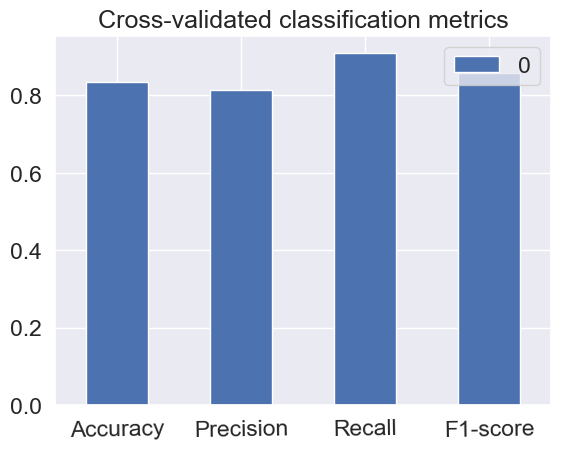

In [112]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                           "F1-score":cv_f1},index=[0])
cv_metrics.T.plot(kind="bar",title="Cross-validated classification metrics")
plt.xticks(rotation=1);

### Feature Importance
Feature Importance is asking,"which features contributed most to outcomes of the model and how did they contributed ?"

Feature Importance is different for each machine learning model.

Let's find features importance for our LogisticRegression model.

In [113]:
clf.fit(Xtrain,ytrain)

LogisticRegression(C=0.20433597178569418, solver='newton-cg')

In [127]:
clf.coef_   #It is Coefficient of the features w.r.t. the decision function in LogisticRegresion.
# +ve coef means feature is Directly related to decision feature.
#-ve coef means feature is inversly related to decision feature.

array([[-0.01269174, -0.99775008,  0.6154086 , -0.02115089, -0.00205547,
         0.06077823,  0.3569387 ,  0.02513478, -0.56181769, -0.57317182,
         0.38897025, -0.60743836, -0.70106319]])

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.012691739526233576,
 'sex': -0.9977500846771199,
 'cp': 0.6154085955831482,
 'trestbps': -0.02115088663377486,
 'chol': -0.0020554660877565053,
 'fbs': 0.060778229926461674,
 'restecg': 0.3569386995761889,
 'thalach': 0.025134775889384713,
 'exang': -0.5618176915048136,
 'oldpeak': -0.5731718202199902,
 'slope': 0.3889702544122645,
 'ca': -0.6074383591507548,
 'thal': -0.7010631931461574}

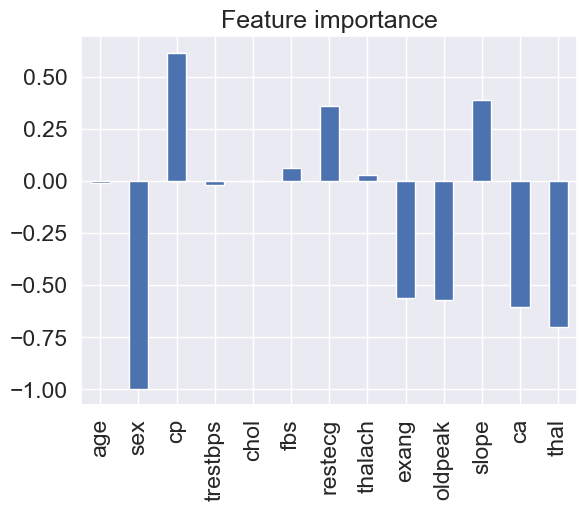

In [120]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature importance",legend=False);

In [121]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [126]:
print(pd.crosstab(df.cp,df.target))
print(pd.crosstab(df.slope,df.target))

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16
target   0    1
slope          
0       12    9
1       91   49
2       35  107


## 6.Further Experimentation
* If evaluation metric is not fulfilled , ask question like: Could you collect more data?
* Could you try a better model? like CatBoost? or XGBoost?
* Could same model be improved further?
* If model is good enough and evaluation metric is fulfilled, how would you export it and share with others ?
